<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#项目介绍" data-toc-modified-id="项目介绍-1">项目介绍</a></span><ul class="toc-item"><li><span><a href="#关键词" data-toc-modified-id="关键词-1.1">关键词</a></span></li></ul></li><li><span><a href="#数据分析与可视化" data-toc-modified-id="数据分析与可视化-2">数据分析与可视化</a></span><ul class="toc-item"><li><span><a href="#一、数据清洗" data-toc-modified-id="一、数据清洗-2.1">一、数据清洗</a></span><ul class="toc-item"><li><span><a href="#异常数据处理" data-toc-modified-id="异常数据处理-2.1.1">异常数据处理</a></span></li><li><span><a href="#数据概览" data-toc-modified-id="数据概览-2.1.2">数据概览</a></span></li><li><span><a href="#重复值处理" data-toc-modified-id="重复值处理-2.1.3">重复值处理</a></span></li></ul></li><li><span><a href="#二、数据分析" data-toc-modified-id="二、数据分析-2.2">二、数据分析</a></span><ul class="toc-item"><li><span><a href="#1.了解圳二手房房源的整体情况（总体分析）" data-toc-modified-id="1.了解圳二手房房源的整体情况（总体分析）-2.2.1">1.了解圳二手房房源的整体情况（总体分析）</a></span></li><li><span><a href="#2.影响深圳二手房源价格的因素分析" data-toc-modified-id="2.影响深圳二手房源价格的因素分析-2.2.2">2.影响深圳二手房源价格的因素分析</a></span></li></ul></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-3">总结</a></span></li></ul></div>

## 项目介绍

本项目主要对链家网站二手房房源数据进行分析，通过数据可视化了解深圳的二手房源情况，对人们购房做出指导。

- 项目背景

随着经济的发展，北、上、广、深这四大都市迅速发展，在经济、政治等方面有突出的表现，而且工作机会多，生活质量较高，是大多数人所向往的地方。但是要在这些城市定居是一件不容易的事情，这样来说购买二手房是一个可以选择的方案，说到这我们一定会想了解这些地区的房源大概情况。所以本项目是对深圳链家二手房房源进行的分析，希望可以帮助部分人解决购房问题，从多维度出发分析，帮助买家拿定主意，实现合理的购房。

深圳二手房房源信息：

数据量18906条；

数据说明：

area：行政区（如：南山区）

title：房源信息标题

community：小区

position：地段位置（如：万象城）

tax：税率相关（如：房本满五年）

total_price：总价，单位：万元

unit_price：单价，单位：元/平米

hourseType：户型（如：三室一厅）

hourseSize：面积，单位：平米

direction：房间朝向

fitment：装修（如：精装，简装）
- 分析目的

了解圳二手房的大体情况，通过对不同行政区、不同户型、不同朝向、不同装修进行分析来了解。

分析深圳二手房房价的影响因素有哪些？优质房源有哪些？

怎么选择合适的房源？

### 关键词
- pandas数据处理、matplotlib、数据可视化、数据探索分析

## 数据分析与可视化

### 一、数据清洗

In [1]:
# 引入使用的库
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点

In [2]:
#读取数据文件，查看数据大体情况
df = pd.read_csv('./shenzhen.csv')
df.head()

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,hourseType,hourseSize,direction,fitment
0,0,罗湖区,满五红本， 户型方正朝南，自住装修保养好，花园社区,金城华庭,螺岭,房本满五年,710.0,79552.0,3室1厅,89.25,南,精装
1,1,罗湖区,7号线洪湖站前59万平洪湖公园后京基水贝*2个万象城,洪湖东岸,翠竹,房本满五年,408.0,54736.0,3室1厅,74.54,西,精装
2,2,罗湖区,《供电南苑。复式三层四房户型》万象城，地理位置优越,供电南苑,万象城,房本满五年,850.0,67649.0,4室1厅,125.65,西,简装
3,3,罗湖区,不用明额 满两年红本 高层东南三房 有钥匙随时可看,翡翠公寓,翠竹,房本满五年,360.0,60627.0,3室2厅,59.38,南,精装
4,4,罗湖区,都市名园 2室1厅 370万,都市名园,万象城,NaN,370.0,48259.0,2室1厅,76.67,东北,简装


In [3]:
df.describe()

,Unnamed: 0,total_price,unit_price,hourseSize
count,18907.000000,18907.000000,18907.000000,18907.000000
mean,9453.000000,686.988634,64893.523721,100.622215
std,5458.125105,621.063940,25713.800191,95.858442
min,0.000000,24.000000,506.000000,13.150000
25%,4726.500000,345.000000,46263.500000,66.830000
50%,9453.000000,505.000000,59441.000000,88.260000
75%,14179.500000,786.000000,78108.000000,121.065000
max,18906.000000,8800.000000,225635.000000,10871.000000


#### 异常数据处理
房间大小有夸大的部分，经过查询发现房价与房源面积不符合客观事实，进行删除

In [4]:
#房间大小超过10000平米的数据
df[df['hourseSize']>10000]

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,hourseType,hourseSize,direction,fitment
12546,12546,宝安区,弘雅二期花园中间，中间楼层，满五年，红本在手,弘雅花园第二期,新安,房本满五年,550.0,506.0,3室2厅,10871.0,东南,其他


In [5]:
# 删除超过10000平米的数据
print(len(df))
df = df.drop(df[df['hourseSize']>10000].index)
print(len(df))

18907
18906


#### 数据概览

In [6]:
#查看每列的总数、数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18906 entries, 0 to 18906
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   18906 non-null  int64  
 1   area         18906 non-null  object 
 2   title        18898 non-null  object 
 3   community    18906 non-null  object 
 4   position     18906 non-null  object 
 5   tax          10710 non-null  object 
 6   total_price  18906 non-null  float64
 7   unit_price   18906 non-null  float64
 8   hourseType   18906 non-null  object 
 9   hourseSize   18906 non-null  float64
 10  direction    18906 non-null  object 
 11  fitment      18906 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.9+ MB


发现title和tax列存在缺失数据，但这两列不是需要分析的列。其它列数据完整，不需要进行处理。

#### 重复值处理

In [7]:
# 查看重复值
df[df.duplicated()]

,Unnamed: 0,area,title,community,position,tax,total_price,unit_price,hourseType,hourseSize,direction,fitment


发现没有重复数据，数据清洗完成，开始数据分析。

### 二、数据分析

#### 1.了解圳二手房房源的整体情况（总体分析）

主要从四个方面出发利用matplotlib绘制饼图。
不同行政区、户型、朝向、装修与二手房房源数量的对比

In [8]:
# 不同行政区房源数量占比
area_house_count = df.groupby('area')['area'].count()
area_house_count.sort_values(ascending=False,inplace=True)  #按照降序排列
# area_house_count

# 不同户型房源数量占比
hourseType_count = df.groupby('hourseType')['hourseType'].count()
hourseType_count.sort_values(ascending=False,inplace=True)  #按照降序排列
new_hourseType_count = hourseType_count[hourseType_count>700]
new_hourseType_count['其它'] = hourseType_count[hourseType_count<700].sum()
# new_hourseType_count

# 不同朝向房源数量占比()
direction_count = df.groupby('direction')['direction'].count()  
new_direction_count =direction_count[direction_count>800]
new_direction_count['其它'] = direction_count[direction_count<800].sum()
new_direction_count.sort_values(ascending=False)

# 不同装修
fitment_count = df.groupby('fitment')['fitment'].count().sort_values(ascending=False)
fitment_count.sort_values(ascending=False,inplace=True)

绘图

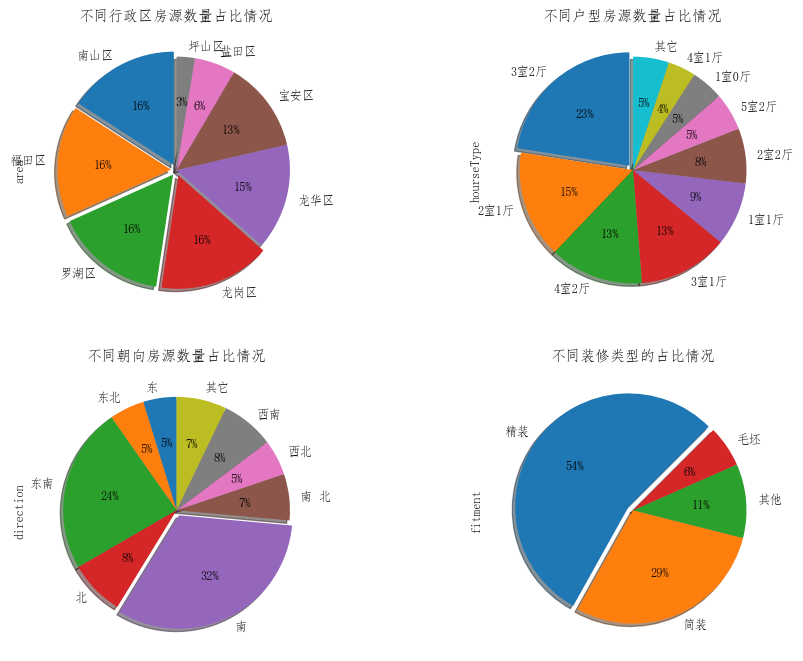

In [9]:
fig=plt.figure(figsize=(12,9),dpi=90)
ax1=fig.add_subplot(2,2,1) 
plt.title("不同行政区房源数量占比情况")
area_house_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0.05,0.05,0.05,0.05,0,0,0,0],labeldistance=1.1,startangle=90)

ax2=fig.add_subplot(2,2,2)
plt.title("不同户型房源数量占比情况")
new_hourseType_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0.05,0,0,0,0,0,0,0,0,0],labeldistance=1.1,startangle=90)

ax3=fig.add_subplot(2,2,3)
plt.title("不同朝向房源数量占比情况")
new_direction_count.plot.pie(shadow=True,autopct='%0.f%%',explode=[0,0,0,0,0.05,0,0,0,0],labeldistance=1.1,startangle=90)

ax4=fig.add_subplot(2,2,4)
plt.title("不同装修类型的占比情况")
fitment_count.plot.pie(shadow=True,autopct='%0.f%%',labeldistance=1.1,explode=[0.05,0,0,0],startangle=45) 
plt.show()

从以上图形我们可以看出：

（1）行政区房源数量，龙岗区、罗湖区、福田区、南山区的二手房房源数量占比为16%且最多，龙华区次之。看来大部分行政区的房源数量还是很充足的，差异最大的是坪山区二手房源数量最少只占了3%。

（2）深圳二手房房源户型类别多，3室2厅户型的数量最多，2室1厅次之。由此看出大众购房户型类别丰富多样，且以常见户型为主。

（3）从不同朝向房源数量占比了解到朝向为南的房源数量最多占所有朝向类型的32%，东南朝向房源数量也挺多占24%，相差不大；南北、西北等其它朝向数量较少。这两种朝向的房源数较多说明了大众买房还是比较喜欢朝南的方向，光线比较充足。

（4）深圳二手房的装修主要以精装和简装为主，精装占很大一部分54%。精装的房间能提高人们入住的舒适度。
总体分析来说提供了选择二手房的大方向。

#### 2.影响深圳二手房源价格的因素分析

- 不同行政区对房价的影响

In [10]:
# 不同区的总价对比
area_house_mean_totalprice = df.groupby('area')['total_price'].mean()
area_house_mean_totalprice.sort_values(ascending=False,inplace=True)
area_house_mean_totalprice

area
南山区    1055.371167
宝安区     815.907730
福田区     757.017633
龙华区     687.321865
盐田区     517.372137
罗湖区     478.523033
龙岗区     474.388533
坪山区     318.978323
Name: total_price, dtype: float64

In [11]:
# 不同区的单价对比
area_house_mean_unitprice = df.groupby('area')['unit_price'].mean()
area_house_mean_unitprice.sort_values(ascending=False,inplace=True)
area_house_mean_unitprice

area
南山区    92239.793667
福田区    77030.074333
宝安区    67826.517791
龙华区    60516.629759
罗湖区    57632.523000
盐田区    49925.460775
龙岗区    44816.287667
坪山区    35425.415133
Name: unit_price, dtype: float64

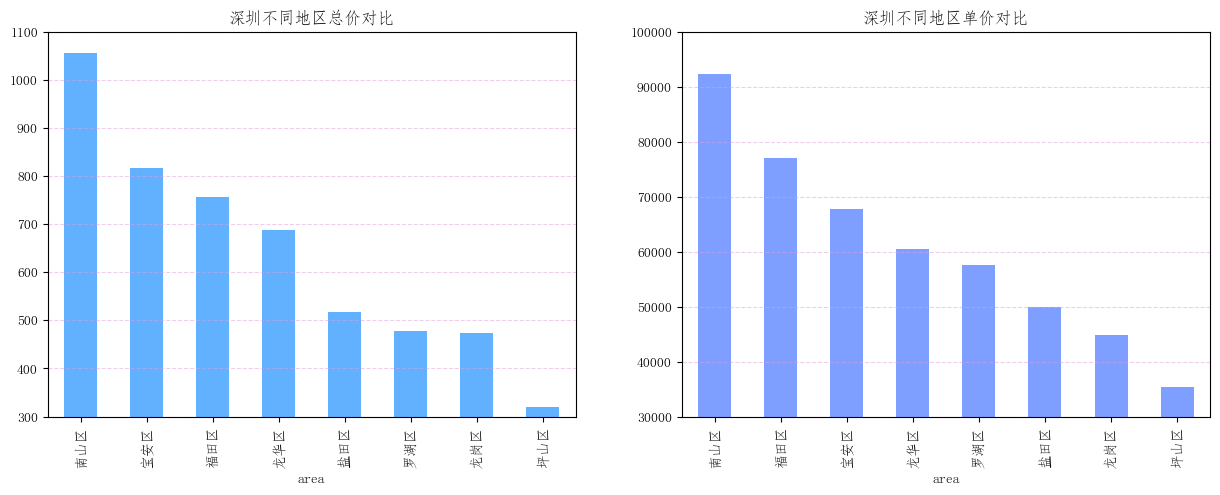

In [12]:
fig = plt.figure(figsize=(15,5),dpi=100)
ax1 = fig.add_subplot(1,2,1)
plt.title("深圳不同地区总价对比")
plt.ylim([300,1100])  #设置y坐标轴的范围
rects = area_house_mean_totalprice.plot.bar(alpha=0.7,color='#1E90FF')
plt.grid(alpha=0.5,color='#DDA0DD',linestyle='--',axis='y')

ax2 = fig.add_subplot(1,2,2)
plt.title("深圳不同地区单价对比")
plt.ylim([30000,100000])
area_house_mean_unitprice.plot.bar(alpha=0.7,color='#4876FF')
plt.grid(alpha=0.5,color='#DDA0DD',linestyle='--',axis='y')

plt.show()

从以上图形我们可以看出，南山区的单价和总价是是8个区中最高的，并且其二手房的总价比其他区的都要高200万左右，二手房单价比其他区的要高20000元左右。坪山区二手房的单价和总价都是最低的。

- 不同地段对房价的影响

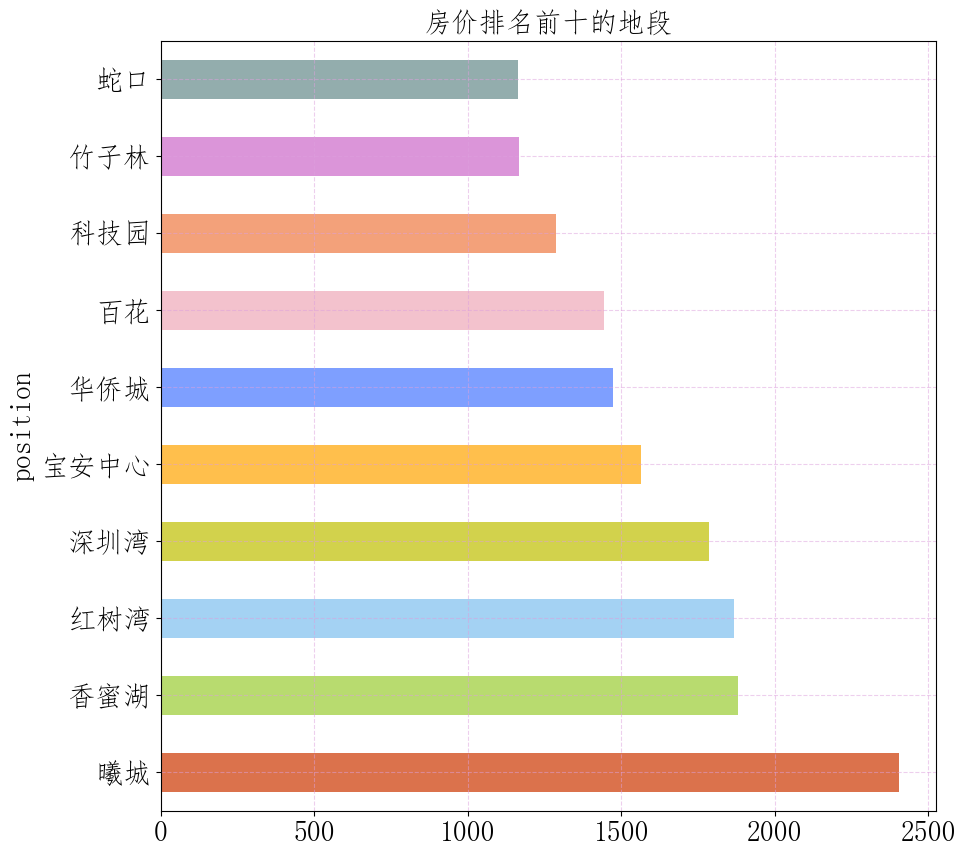

In [13]:
position_house_mean_price = df.groupby('position')['total_price'].mean()
position_house_mean_price.sort_values(ascending=False,inplace=True)

#绘图  只展示排名前十的地段

ax = plt.subplot(111)
plt.title("房价排名前十的地段",fontsize=20) # 设置标题字体大小
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 设置坐标标签字体大小
ax.set_xlabel(..., fontsize=20)
ax.set_ylabel(..., fontsize=20)

position_house_mean_price.head(10).plot.barh(alpha=0.7,color=[
    '#CD3700','#9ACD32','#7EC0EE','y','orange','#4876FF','#EEA9B8','#EE7942','#CD69C9','#668B8B'])
plt.grid(color='#DDA0DD',linestyle='--',alpha=0.5)
plt.show()

由以上图形可知，排名前十的地段分别为：曦城、香蜜湖、红树湾、深圳湾、宝安中心、华侨城、百花、科技园、竹子林、蛇口，曦城的房价最高，前十的所有地段的二手房源总价都高于1200万元。可见要想住在好地段就得有雄厚的经济实力。
那么排名前十的地段分布在哪个行政区呢？（只分析排名前2的行政区）

- 南山区和宝安区，不同地段对房价的影响，排名前十的地段在这两区的分布情况


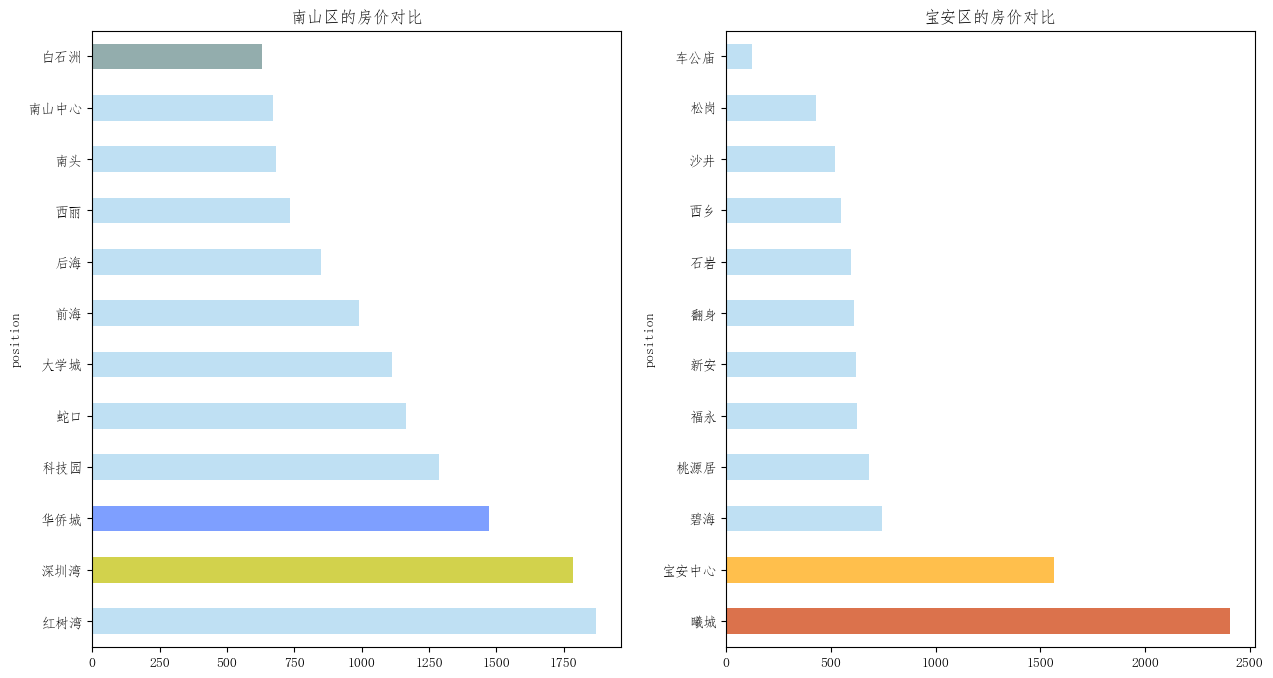

In [14]:
# 南山区的不同地段的均价对比
area_nanshan_price = df[df['area']=='南山区'].groupby('position')['total_price'].mean()
area_nanshan_price.sort_values(ascending=False,inplace=True)
#area_nanshan_price

# 宝安区的不同地段的均价对比
area_baoan_price = df[df['area']=='宝安区'].groupby('position')['total_price'].mean()
area_baoan_price.sort_values(ascending=False,inplace=True)
#area_baoan_price

fig = plt.figure(figsize=(15,8),dpi=100)
ax1 = fig.add_subplot(1,2,1)
plt.title("南山区的房价对比")
area_nanshan_price.plot.barh(alpha=0.7,color=['#A4D3EE','y','#4876FF','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#668B8B']) 

ax2 = fig.add_subplot(1,2,2)
plt.title("宝安区的房价对比")
area_baoan_price.plot.barh(alpha=0.7,color=['#CD3700','orange','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE','#A4D3EE']) 
plt.show() 

从以上图形可以看出：二手房房价排名前十的地段在南山区占了三个，在宝安区占了两个。宝安区的不同地段房价高低差异比较大，大部分房价都是在600万左右。

- 总价排名前十的小区

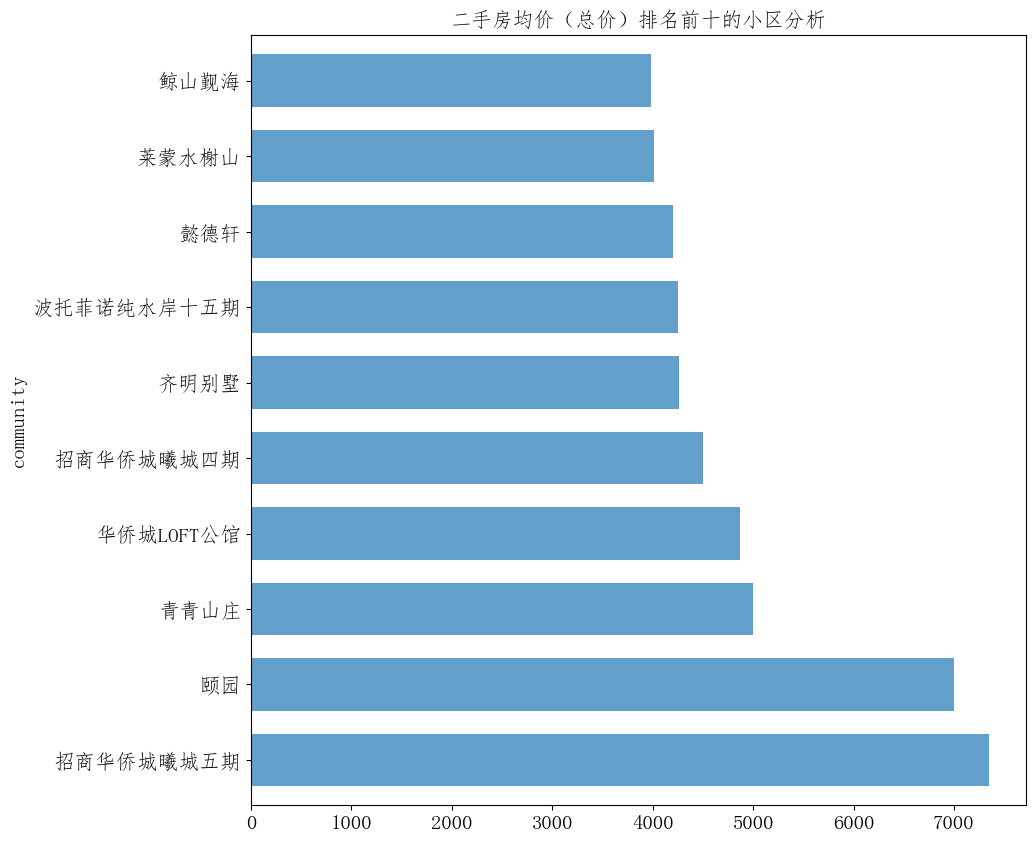

In [15]:
community_top10 = df.groupby('community')['total_price'].mean().sort_values(ascending=False).head(10)

# fig = plt.figure(figsize=(12,8),dpi=100)
# ax = fig.add_subplot(1,1,1)
ax = plt.subplot(111)
# 设置刻度字体大小
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# 设置坐标标签字体大小
ax.set_xlabel(..., fontsize=15)
ax.set_ylabel(..., fontsize=15)

plt.title("二手房均价（总价）排名前十的小区分析",fontsize=15)
community_top10.plot.barh(alpha=0.7,width=0.7)
plt.show()

以上图可以看出，二手房房源总价排名前十的小区都有哪些，可以通过这个作为选择小区的依据。

- 房屋朝向对价格的影响

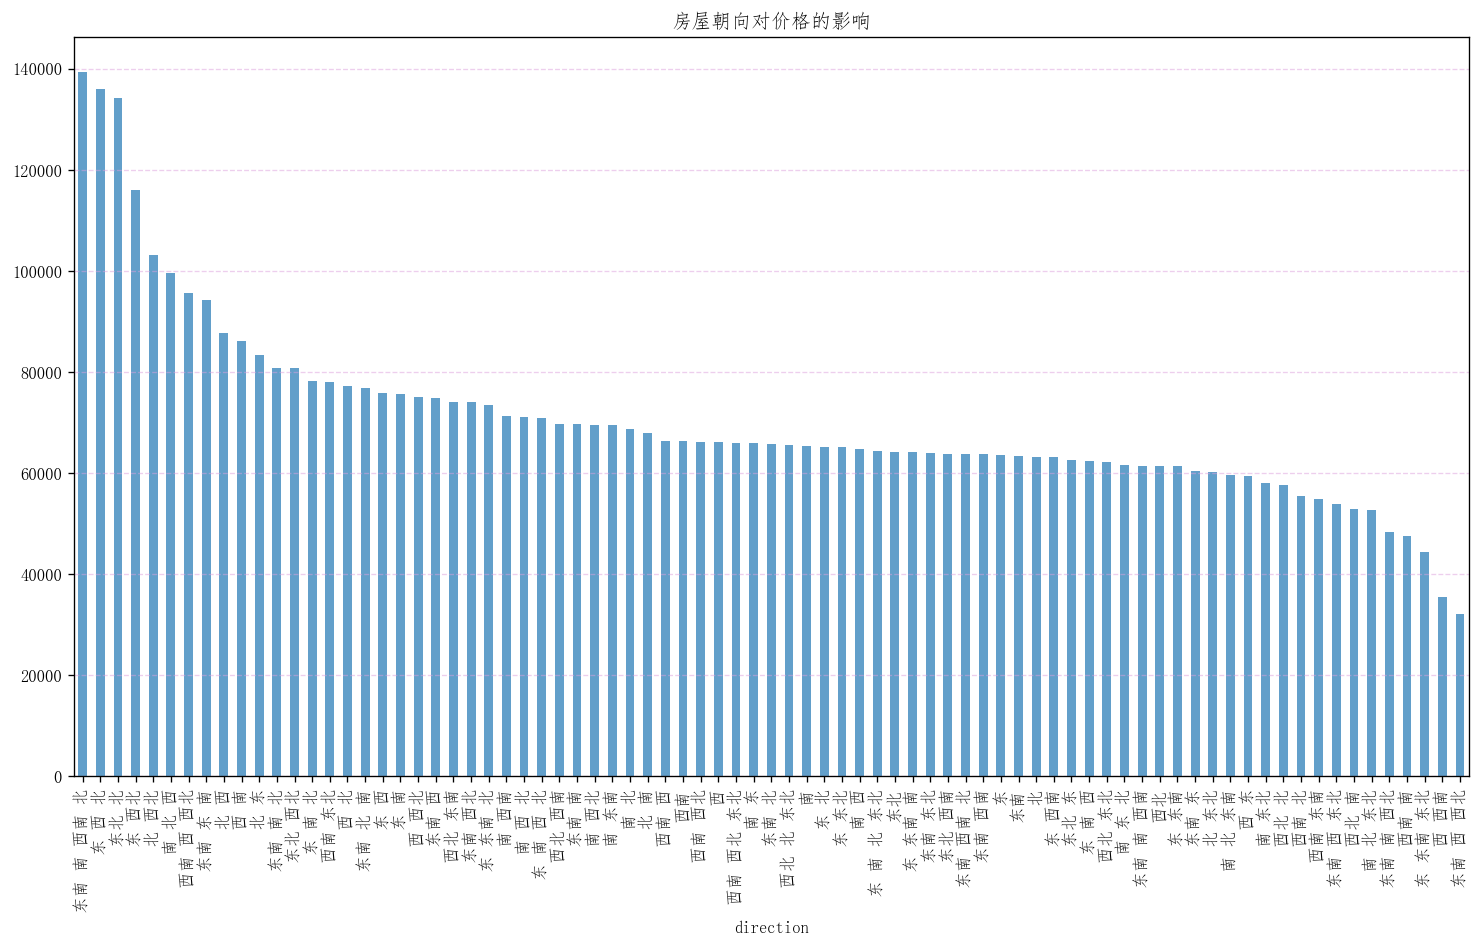

In [16]:
# 房屋朝向对价格的影响，只分析单价
direction_unit_price = df.groupby('direction')['unit_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,8),dpi=120)
plt.title("房屋朝向对价格的影响")
direction_unit_price.plot.bar(alpha=0.7)
plt.grid(color='#DDA0DD',linestyle='--',alpha=0.5,axis='y')
plt.show()

- 装修对价格的影响

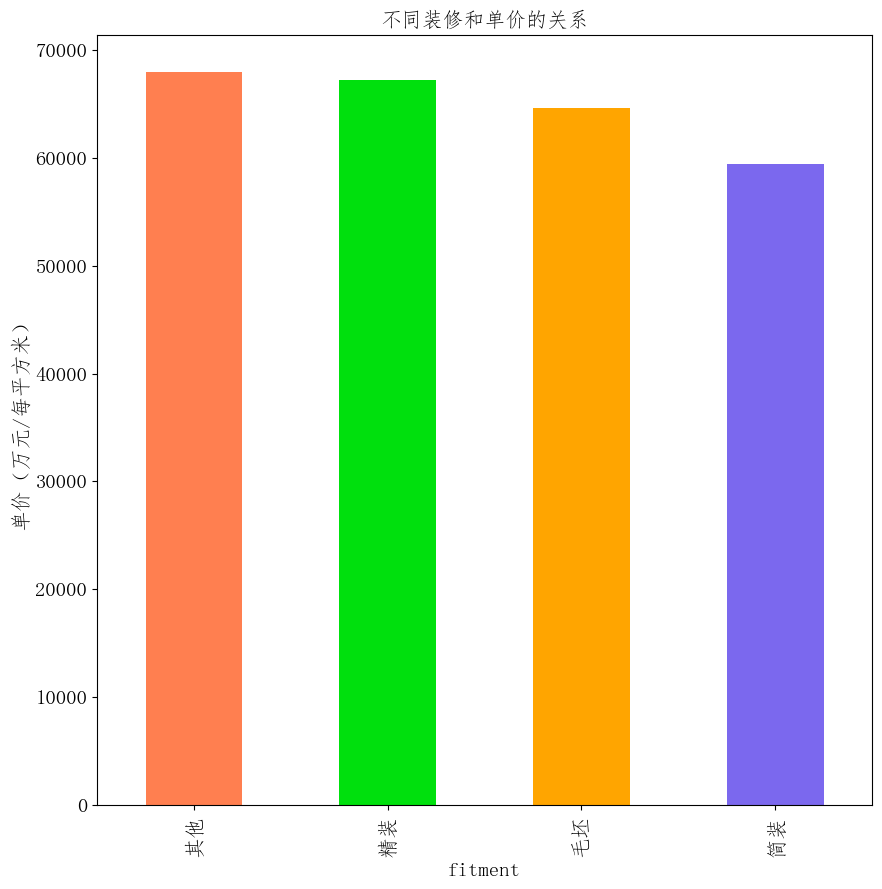

In [17]:
fit_price = df.groupby('fitment')['unit_price'].mean().sort_values(ascending=False)

ax = plt.subplot(111)
# 设置刻度字体大小
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# 设置坐标标签字体大小
ax.set_xlabel(..., fontsize=15)
ax.set_ylabel(..., fontsize=15)
plt.title("不同装修和单价的关系", fontsize=15)
plt.ylabel("单价（万元/每平方米）", fontsize=15)

fit_price.plot.bar(color=['#FF7F50','#00E00D','#FFA500','#7B68EE'])
plt.show()

装修的价格没有太大的差异。

- 分析房屋大小与房价之间的关系

C:\Users\Administrator\Envs\jv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


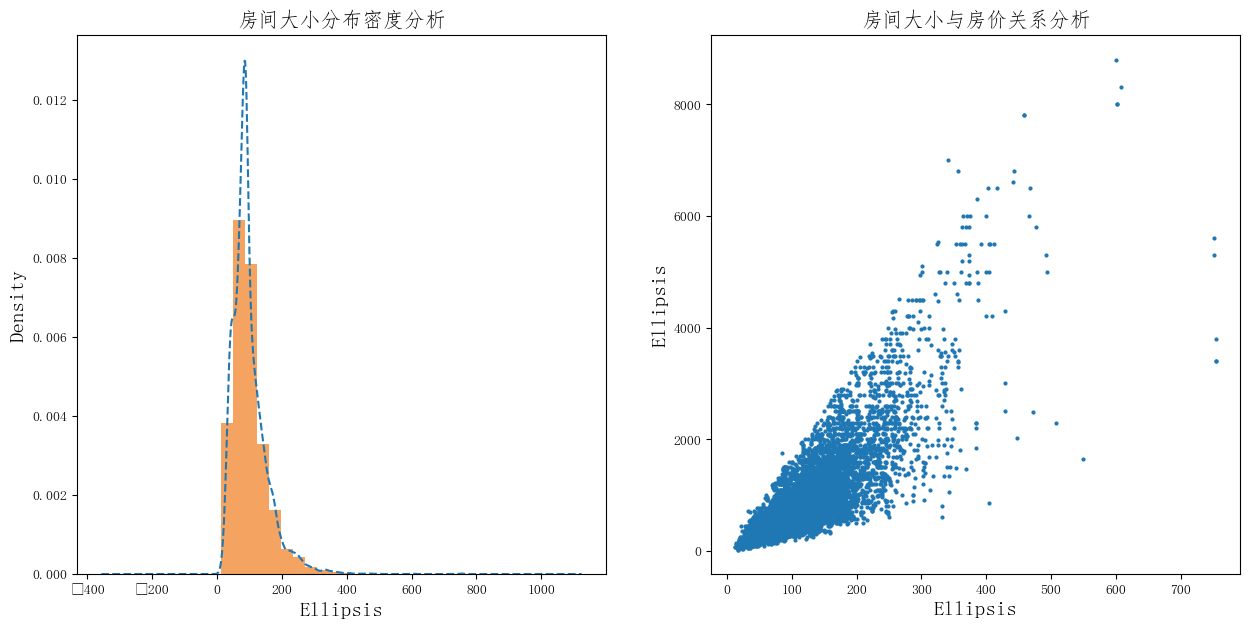

In [18]:
# 通过密度图和散点图来分析房屋特征
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)
# 设置坐标标签字体大小
ax1.set_xlabel(..., fontsize=15)
ax1.set_ylabel(..., fontsize=15)

plt.title("房间大小分布密度分析",fontsize=15)
df['hourseSize'].hist(bins=20,ax=ax1,color='#F4A460',density= True)  #直方图  desity=True显示频率，为False显示频数
df['hourseSize'].plot(kind='kde',style='--',ax=ax1)     #折线图 kind='kde'(是与直方图相关的密度图)

ax2 = fig.add_subplot(1,2,2)
# 设置坐标标签字体大小
ax2.set_xlabel(..., fontsize=15)
ax2.set_ylabel(..., fontsize=15)

plt.title("房间大小与房价关系分析",fontsize=15)
plt.scatter(df['hourseSize'],df['total_price'],s=4)
plt.show()

由上图知：

（1）房源面积主要集中分布在0-250平米之间，但是还有部分房间面积超出正常范围。总的来说比较稳定

（2）由散点图可以看出，随着房间面积增大，房间的总价在不断升高，面积和总价成正相关。 面积处在0-200之间的房源，总价在0-2000万元之间。

- 其它方面的分析

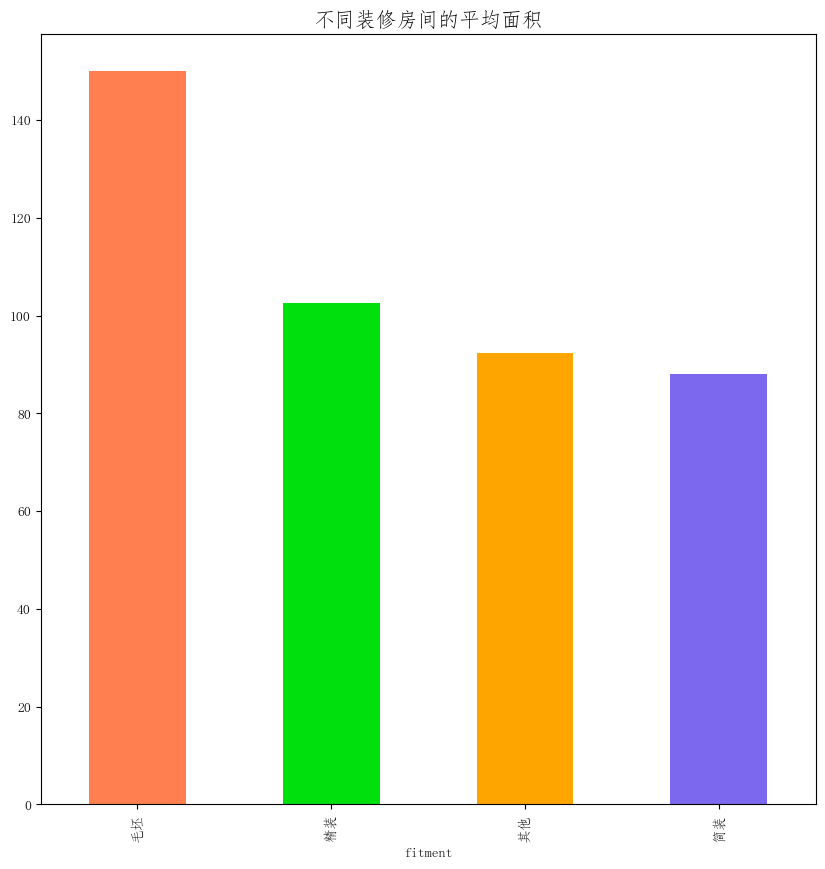

In [19]:
# 不同装修房间的平均面积
fit_average_size = df.groupby('fitment')['hourseSize'].mean().sort_values(ascending=False)
fit_average_size 
plt.title("不同装修房间的平均面积",fontsize=15)
# plt.ylable("面积（平米）")
fit_average_size .plot.bar(color=['#FF7F50','#00E00D','#FFA500','#7B68EE'])
plt.show()

由上图可以看出毛坯房的面积最大，比其它三种装修类型的面积大50平米左右，其它三种装修类型的平均面积相差不大。

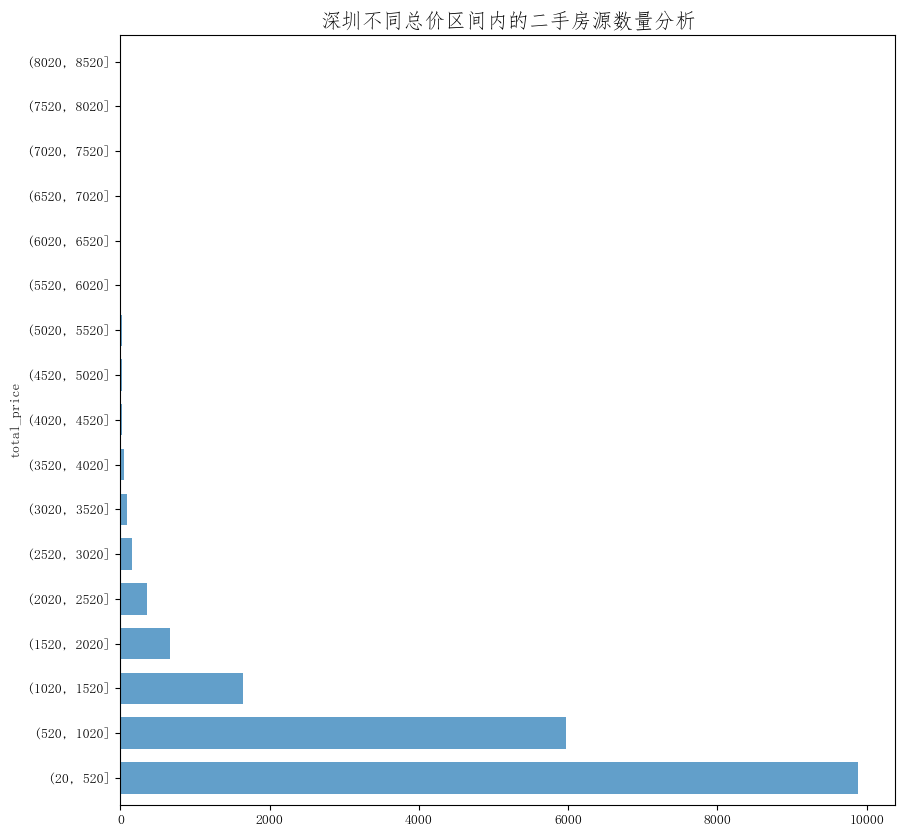

In [20]:
# 不同价格区间内的房源数量

bins_arr = np.arange(20,9000,500)
bins = pd.cut(df['total_price'],bins_arr)
totalprice_counts = df['total_price'].groupby(bins).count()

plt.title("深圳不同总价区间内的二手房源数量分析",fontsize=15)
plt.ylabel("二手房数量")
totalprice_counts.plot.barh(alpha=0.7,width=0.7) 
plt.show()

由上图可以看出，房价（总价）在（20，250]间的房源数量最多，（520,1020]房源数量次之，价格特别高的房很少。可以说房价处于正常范围内。

## 总结

房源数量最多的区有龙岗区、罗湖区、福田区、南山区，在这四个区中南山区宝安区、福田区的总价比较高都在700百万以上。

对于想选择好地段、价钱差不多就行的人，推荐选择宝安中心的房源。因为宝安中心价格在排名前十的地段中位于第5，说明地段不错，房价在前十中不算很高，值得推荐。

小区的选择可以参照二手房均价（总价）排名前十的小区，进行选择。房屋朝向推荐朝南，朝东南的方向。

装修可以根据自己的喜好进行选择，优先选择精装，要想房间面积大可以选择毛坯房。

房间面积主要集中在0-250平米之间，价格低于2000万元。

对于普通大众，可以考虑20-250万元的房源（在这里推荐坪山区）可能在地段的选择上可以不怎么考虑，但是房屋朝向，装修可供选择的种类还是挺多的。